In [1]:
import numpy as np 
from scipy.stats import norm
import matplotlib.pyplot as plt 

In [2]:
class BlackScholes:
    def __init__(self,strike,price,vol,time,r,dividend_yield):

        if np.any(price<0) or vol<0 or time<=0:
            raise ValueError('The values are not following the assumptions of the model ')
        self.S=price
        self.K=strike
        self.vol=vol
        self.T=time
        self.r=r
        self.d=dividend_yield

        
        
    @property
    def d1(self):
        return (np.log(self.S/self.K)+(self.r-self.d+0.5*(self.vol**2))*self.T)/(self.vol*np.sqrt(self.T))
    
    @property
    def d2(self):
        return self.d1-self.vol*np.sqrt(self.T)

        

    def Call(self):
        return self.S*np.exp(-self.d*self.T)*norm.cdf(self.d1,0,1)-self.K*np.exp(-self.r*self.T)*norm.cdf(self.d2,0,1)
    
    def Put(self):
        return -self.S*np.exp(-self.d*self.T)*norm.cdf(-self.d1,0,1)+self.K*np.exp(-self.r*self.T)*norm.cdf(-self.d2,0,1)
    
    def parity(self):
        C=self.Call()
        P=self.Put()
        if C+self.K*np.exp(-self.r*self.T)!= P+self.S*np.exp(-self.d*self.T):
            return("Arbitrage opportunity the call/put parity is not respected ")
        else:
            return("No arbitrage opportunity, the call/put parity is respected")

    
    def Delta(self,option_type):

        if str(option_type.capitalize())=='Call':
            return norm.cdf(self.d1,0,1)*np.exp(-self.d*self.T)
        
        elif str(option_type.capitalize())=='Put':
            return -norm.cdf(-self.d1,0,1)*np.exp(-self.d*self.T)
        
        else:
            raise ValueError('please select Call or Put')


    def delta_graph(self,start,end,option_type):

        intitial_price=self.S
        self.S=np.linspace(max(0.1,start),end,1000)
        plt.figure()
        plt.plot(self.S,self.Delta(str(option_type.capitalize())))
        plt.title('Evolution of Delta')
        plt.xlabel('Underlying asset price')
        plt.ylabel('Delta')
        plt.grid(True)
        self.S=intitial_price
        
    
    def Gamma(self):
        return (norm.pdf(self.d1,0,1)/(self.S*np.sqrt(self.T)*self.vol))*np.exp(-self.d*self.T)
    

    def gamma_graph(self,start,end):

        intitial_price=self.S
        self.S=np.linspace(max(1,start),end,1000)
        plt.figure()
        plt.plot(self.S,self.Gamma())
        plt.title('Evolution of Gamma')
        plt.xlabel('Underlying asset price')
        plt.ylabel('Gamma')
        plt.grid(True)
        self.S=intitial_price
    

    def Vega(self):
        return self.S*np.exp(-self.d*self.T)*norm.pdf(self.d1,0,1)*np.sqrt(self.T)/100
    
    def vega_graph(self):
        initial_price=self.S
        self.S=np.linspace(0,self.S*2,300)
        plt.figure()
        plt.plot(self.S,self.Vega())
        plt.title('Evolution of Vega')
        plt.xlabel('Underlying asset price')
        plt.ylabel('Vega')
        plt.grid(True)
        self.S=initial_price


    def Theta(self,option_type):

        if str(option_type.capitalize())=='Call':
            return(-((self.S*np.exp(-self.d*self.T)*norm.pdf(self.d1,0,1)*self.vol)/(2*np.sqrt(self.T)))+self.d*self.S*np.exp(-self.d*self.T)* norm.cdf(self.d1, 0, 1)-self.r*self.K*np.exp(-self.r*self.T)*norm.cdf(self.d2,0,1))/252
        
        elif str(option_type.capitalize())=='Put':
            return(-((self.S*np.exp(-self.d*self.T)*norm.pdf(self.d1,0,1)*self.vol)/(2*np.sqrt(self.T)))-self.d*self.S*np.exp(-self.d*self.T)* norm.cdf(-self.d1, 0, 1)+self.r*self.K*np.exp(-self.r*self.T)*norm.cdf(-self.d2,0,1))/252
        
        else:
            raise ValueError('please select Call or Put')
        
    def theta_graph(self, end, option_type):
        intitial_price=self.S
        self.S=np.linspace(0,int(end),300)
        plt.figure()
        plt.plot(self.S,self.Theta(option_type.capitalize()))
        plt.title('Evolution of Theta')
        plt.xlabel('Underlying asset price')
        plt.ylabel('Theta')
        plt.grid(True)
        self.S=intitial_price


    def Rho(self, option_type):
        
        if str(option_type.capitalize())=='Call':
            return (self.K*self.T*np.exp(-self.r*self.T)*norm.cdf(self.d2,0,1))/100
        
        elif str(option_type.capitalize())=='Put':
            return (-self.K*self.T*np.exp(-self.r*self.T)*norm.cdf(-self.d2,0,1))/100
        
        else:
            raise ValueError('please select Call or Put')
        
    def rho_graph(self, option_type):
        intitial_price=self.S
        self.S=np.linspace(0,intitial_price*2,300)
        plt.figure()
        plt.plot(self.S,self.Rho(option_type.capitalize()))
        plt.title('Evolution of Rho')
        plt.xlabel('Underlying asset price')
        plt.ylabel('Rho')
        plt.grid(True)
        self.S=intitial_price

        

        

In [3]:

asset1 = BlackScholes(70, 69, 0.35, 0.5, 0.05,0.03)


print(f"Call Price : {asset1.Call()}")
print(f"Put Price : {asset1.Put()}")
print(f"Delta Call : {asset1.Delta('Call')}")
print(f"Delta Put : {asset1.Delta('Put')}")
print(f"Gamma : {asset1.Gamma()}")
print(f"Vega : {asset1.Vega()}")
print(f"Theta Call : {asset1.Theta('Call')}")
print(f"Theta Put : {asset1.Theta('Put')}")
print(f"Rho Call : {asset1.Rho('Call')}")
print(f"Rho Put : {asset1.Rho('Put')}")

print(asset1.parity())


Call Price : 6.5603607869805
Put Price : 6.859330796352456
Delta Call : 0.5341404933060296
Delta Put : -0.4509714462970329
Gamma : 0.02288511826522938
Vega : 0.1906730841063249
Theta Call : -0.028105768988629633
Theta Put : -0.02265178892068985
Rho Call : 0.15147666625567774
Rho Put : -0.18988180295423862
No arbitrage opportunity, the call/put parity is respected


None
None
None
None
None


/var/folders/_n/wtyyv5nn2rl75vgbry80x49h0000gn/T/ipykernel_19560/781620241.py:17: RuntimeWarning: divide by zero encountered in log
  return (np.log(self.S/self.K)+(self.r-self.d+0.5*(self.vol**2))*self.T)/(self.vol*np.sqrt(self.T))


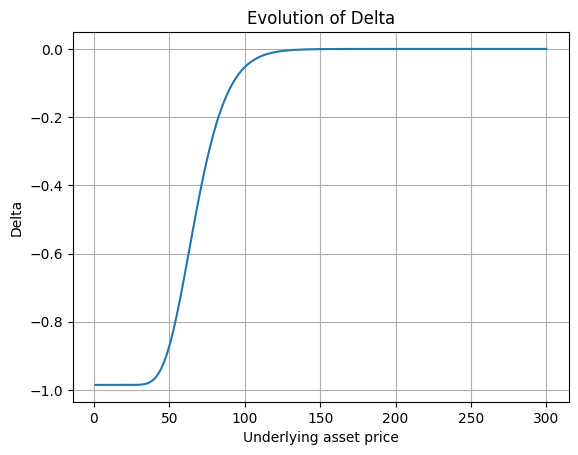

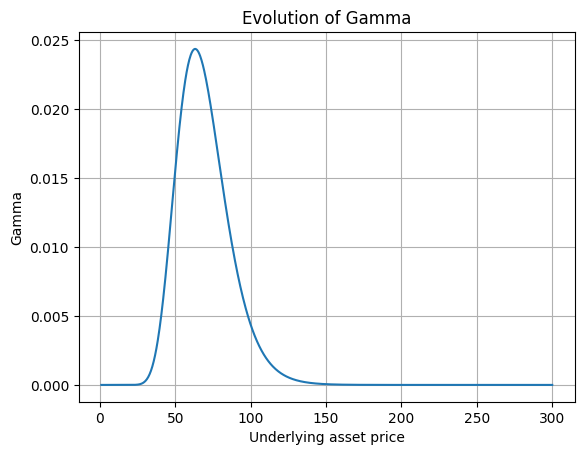

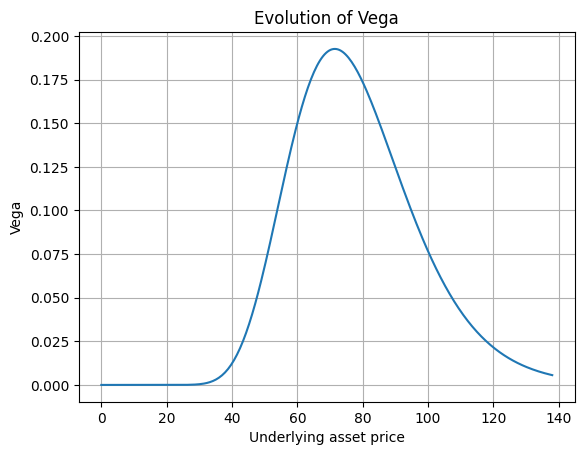

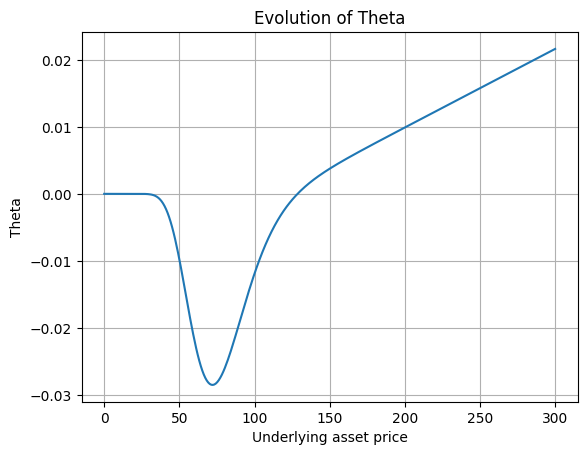

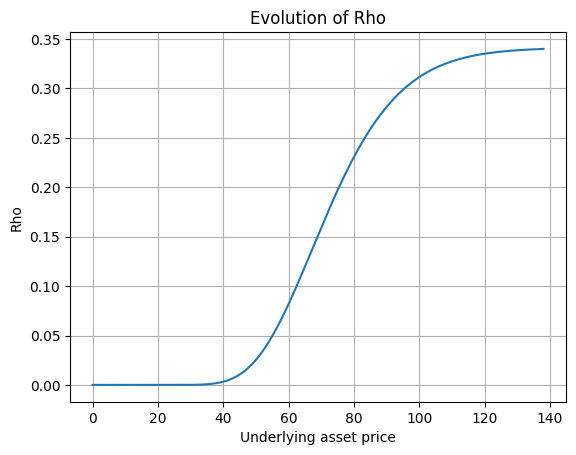

In [4]:
print(asset1.delta_graph(1,300,'Put'))
print(asset1.gamma_graph(0.5,300))
print(asset1.vega_graph())
print(asset1.theta_graph(300,'call'))
print(asset1.rho_graph('call'))